In [38]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
nltk.download('wordnet')
nltk.download('omw-1.4')
!pip install lightgbm


[nltk_data] Downloading package wordnet to C:\Users\Rani
[nltk_data]     Raut\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Rani
[nltk_data]     Raut\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [43]:
# importing libraries
from datetime import datetime
from lightgbm import LGBMRegressor
#import gresearch_crypto
import traceback
import time
from datetime import datetime
import plotly.graph_objects as go
from sklearn.model_selection import GridSearchCV



In [3]:
#loading datasets
path = "g-research-crypto-forecasting/"
df_train = pd.read_csv(path + "train.csv")
df_test = pd.read_csv(path + "example_test.csv")
df_asset_details = pd.read_csv(path + "asset_details.csv")

In [4]:
df_train.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [5]:
df_test.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,group_num,row_id
0,1623542400,3,1201.0,1.478556,1.48603,1.47800,1.483681,654799.561103,1.481439,0,0
1,1623542400,2,1020.0,580.306667,583.89000,579.91000,582.276667,1227.988328,581.697038,0,1
2,1623542400,0,626.0,343.789500,345.10800,343.64000,344.598000,1718.832569,344.441729,0,2
3,1623542400,1,2888.0,35554.289632,35652.46465,35502.67000,35602.004286,163.811537,35583.469303,0,3
4,1623542400,4,433.0,0.312167,0.31260,0.31192,0.312208,585577.410442,0.312154,0,4


In [6]:
df_train.describe()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
count,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423680e+07,2.348647e+07
mean,1.577120e+09,6.292544e+00,2.864593e+02,1.432640e+03,1.436350e+03,1.429568e+03,1.432640e+03,2.868530e+05,NaN,7.121752e-06
std,3.323350e+07,4.091861e+00,8.673982e+02,6.029605e+03,6.039482e+03,6.020261e+03,6.029611e+03,2.433935e+06,NaN,5.679042e-03
min,1.514765e+09,0.000000e+00,1.000000e+00,1.170400e-03,1.195000e-03,2.000000e-04,1.171400e-03,-3.662812e-01,-inf,-5.093509e-01
25%,1.549011e+09,3.000000e+00,1.900000e+01,2.676500e-01,2.681600e-01,2.669000e-01,2.676483e-01,1.410725e+02,2.676368e-01,-1.694354e-03
50%,1.578372e+09,6.000000e+00,6.400000e+01,1.428860e+01,1.431250e+01,1.426300e+01,1.428920e+01,1.295415e+03,1.428769e+01,-4.289844e-05
75%,1.606198e+09,9.000000e+00,2.210000e+02,2.288743e+02,2.293000e+02,2.284200e+02,2.288729e+02,2.729764e+04,2.288728e+02,1.601520e-03
max,1.632182e+09,1.300000e+01,1.650160e+05,6.480594e+04,6.490000e+04,6.467053e+04,6.480854e+04,7.597554e+08,inf,9.641699e-01


In [7]:
#auxiliary function, from datetime to timestamp
totimestamp = lambda s: np.int32(time.mktime(datetime.strptime(s, "%d/%m/%Y").timetuple()))

In [8]:
df_asset_details

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


In [9]:
## checking Time Range
btc = df_train[df_train["Asset_ID"]==1].set_index("timestamp") #Asset_ID = 1 for Bitcoin
eth = df_train[df_train["Asset_ID"]==6].set_index("timestamp") #Asset_ID = 6 for Ethereum
bnb = df_train[df_train["Asset_ID"]==0].set_index("timestamp") #Asset_ID = 0 for Binance coin
ada = df_train[df_train["Asset_ID"]==3].set_index("timestamp") #Asset_ID = 3 for Cardano

beg_btc = datetime.fromtimestamp(btc.index[0]).strftime("%A, %B %d, %Y %I:%M:%S")
end_btc = datetime.fromtimestamp(btc.index[-1]).strftime("%A, %B %d, %Y %I:%M:%S")
beg_eth = datetime.fromtimestamp(eth.index[0]).strftime("%A, %B %d, %Y %I:%M:%S")
end_eth = datetime.fromtimestamp(eth.index[-1]).strftime("%A, %B %d, %Y %I:%M:%S")
beg_bnb = datetime.fromtimestamp(eth.index[0]).strftime("%A, %B %d, %Y %I:%M:%S")
end_bnb = datetime.fromtimestamp(eth.index[-1]).strftime("%A, %B %d, %Y %I:%M:%S")
beg_ada = datetime.fromtimestamp(eth.index[0]).strftime("%A, %B %d, %Y %I:%M:%S")
end_ada = datetime.fromtimestamp(eth.index[-1]).strftime("%A, %B %d, %Y %I:%M:%S")

print('Bitcoin data goes from ', beg_btc, 'to ', end_btc)
print('Ethereum data goes from ', beg_eth, 'to ', end_eth)
print('Binance coin data goes from ', beg_bnb, 'to ', end_bnb)
print('Cardano data goes from ', beg_ada, 'to ', end_ada)


Bitcoin data goes from  Sunday, December 31, 2017 06:01:00 to  Monday, September 20, 2021 07:00:00
Ethereum data goes from  Sunday, December 31, 2017 06:01:00 to  Monday, September 20, 2021 07:00:00
Binance coin data goes from  Sunday, December 31, 2017 06:01:00 to  Monday, September 20, 2021 07:00:00
Cardano data goes from  Sunday, December 31, 2017 06:01:00 to  Monday, September 20, 2021 07:00:00


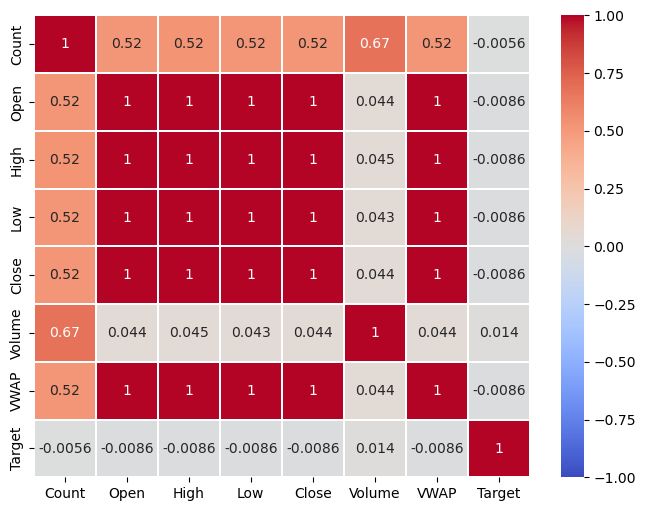

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(btc[['Count','Open','High','Low','Close','Volume','VWAP','Target']].corr(),
           vmin=-1.0, vmax=1.0, annot= True, cmap= 'coolwarm', linewidth=0.1)
plt.show()


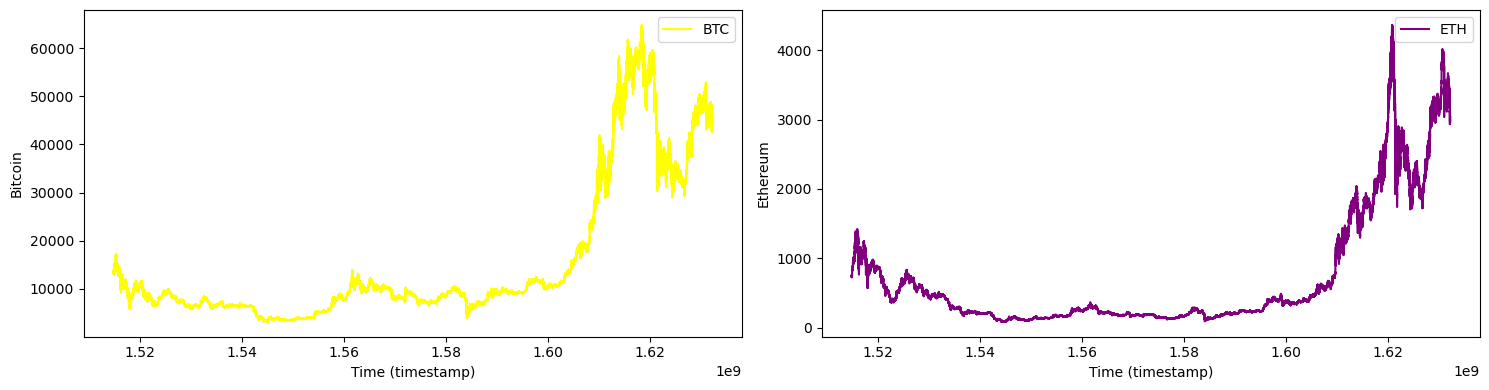

In [11]:
f = plt.figure(figsize=(15,4))

#fill NAs for BTC and ETH
btc = btc.reindex(range(btc.index[0],btc.index[-1]+60,60),method='pad')
eth = eth.reindex(range(eth.index[0],eth.index[-1]+60,60),method='pad')

ax = f.add_subplot(121)
plt.plot(btc['Close'],color='yellow', label='BTC')
plt.legend()
plt.xlabel('Time (timestamp)')
plt.ylabel('Bitcoin')

ax2 = f.add_subplot(122)
ax2.plot(eth['Close'],color='purple', label='ETH')
plt.legend()
plt.xlabel('Time (timestamp)')
plt.ylabel('Ethereum')

plt.tight_layout()
plt.show()

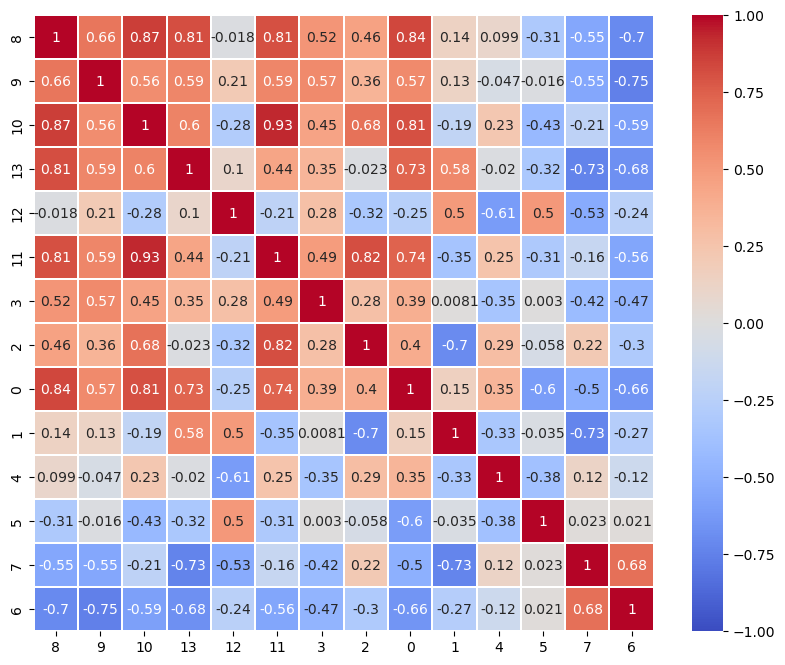

In [12]:
data = df_train[-1000:]
check = pd.DataFrame()
for i in data.Asset_ID.unique():
    check[i] = data[data.Asset_ID==i]['Target'].reset_index(drop=True)
    
plt.figure(figsize=(10,8))
sns.heatmap(check.dropna().corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidth=0.1)
plt.show()

In [13]:
def hlco_ratio(df):
    return (df['High'] - df['Low'])/(df['Close']-df['Open'])
def upper_shadow(df):
    return df['High'] - np.maximum(df['Close'],df['Open'])
def lower_shadow(df):
    return np.minimum(df['Close'],df['Open']) - df['Low']

def get_features(df):
    df_feat = df[['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']].copy()
    df_feat['hlco_ratio'] = hlco_ratio(df_feat)
    df_feat['Upper_shadow'] = upper_shadow(df_feat)
    df_feat['Lower_shadow'] = lower_shadow(df_feat)
    return df_feat
    

In [16]:
#train test split df_train into 80% train rows and 20% valid rows
train_data = df_train
#train_data = df_train.sample(frac = 0.8)
#valid_data = df_train.drop(train_data.index)

def get_Xy_and_model_for_asset(df_train, asset_id):
    df = df_train[df_train["Asset_ID"]==asset_id]
    
    df = df.sample(frac=0.2)
    df_proc = get_features(df)
    df_proc['y'] = df["Target"]
    df_proc.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_proc = df_proc.dropna(how='any')
    
    X= df_proc.drop("y", axis=1)
    y= df_proc["y"]
    model= LGBMRegressor()
    model.fit(X, y)
    return X, y, model

Xs = {}
ys = {}
models = {}

for asset_id, asset_name in zip(df_asset_details['Asset_ID'], df_asset_details['Asset_Name']):
    print(f"Training model for {asset_name:<16} (ID={asset_id:<2})")
    X,y, model = get_Xy_and_model_for_asset(train_data, asset_id)
    try:
        Xs[asset_id], ys[asset_id], models[asset_id] = X, y, model
    except:
        Xs[asset_id], ys[asset_id], models[asset_id] = X, y, model = None, None, None

Training model for Bitcoin Cash     (ID=2 )
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 381070, number of used features: 10
[LightGBM] [Info] Start training from score -0.000010
Training model for Binance Coin     (ID=0 )
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008898 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 374094, number of used features: 10
[LightGBM] [Info] Start training from score 0.000022
Training model for Bitcoin          (ID=1 )
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009394 seconds.
You can set `

In [19]:
parameters = {
    #'max_depth': range(2,10,1)
    'num_leaves': range(21,161,10),
    'learning_rate':[0.1,0.01,0.05]
}

new_models = {}
for asset_id, asset_name in zip(df_asset_details['Asset_ID'], df_asset_details['Asset_Name']):
    print("GridSearchCV for:" +asset_name)
    grid_search = GridSearchCV(
        estimator=get_Xy_and_model_for_asset(df_train, asset_id)[2], #bitcoin
        param_grid=parameters,
        n_jobs = -1,
        cv = 5,
        verbose=True
    )
    grid_search.fit(Xs[asset_id], ys[asset_id])
    new_models[asset_id] = grid_search.best_estimator_
    grid_search.best_estimator_

GridSearchCV for:Bitcoin Cash
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008980 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 380949, number of used features: 10
[LightGBM] [Info] Start training from score -0.000014
Fitting 5 folds for each of 42 candidates, totalling 210 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009854 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 381070, number of used features: 10
[LightGBM] [Info] Start training from score -0.000010
GridSearchCV for:Binance Coin
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

In [20]:
for asset_id, asset_name in zip(df_asset_details['Asset_ID'], df_asset_details['Asset_Name']):
    print(f"Tuned model for{asset_name:<1} (ID={asset_id:})")
    print(new_models[asset_id])

Tuned model forBitcoin Cash (ID=2)
LGBMRegressor(learning_rate=0.01)
Tuned model forBinance Coin (ID=0)
LGBMRegressor(learning_rate=0.01, num_leaves=61)
Tuned model forBitcoin (ID=1)
LGBMRegressor(learning_rate=0.05, num_leaves=61)
Tuned model forEOS.IO (ID=5)
LGBMRegressor(learning_rate=0.01, num_leaves=121)
Tuned model forEthereum Classic (ID=7)
LGBMRegressor(learning_rate=0.05, num_leaves=21)
Tuned model forEthereum (ID=6)
LGBMRegressor(learning_rate=0.05, num_leaves=41)
Tuned model forLitecoin (ID=9)
LGBMRegressor(learning_rate=0.05, num_leaves=21)
Tuned model forMonero (ID=11)
LGBMRegressor(learning_rate=0.01, num_leaves=111)
Tuned model forTRON (ID=13)
LGBMRegressor(learning_rate=0.01, num_leaves=151)
Tuned model forStellar (ID=12)
LGBMRegressor(learning_rate=0.05, num_leaves=21)
Tuned model forCardano (ID=3)
LGBMRegressor(learning_rate=0.01, num_leaves=151)
Tuned model forIOTA (ID=8)
LGBMRegressor(learning_rate=0.01, num_leaves=121)
Tuned model forMaker (ID=10)
LGBMRegressor(lea

In [45]:
"""env = gresearch_crypto.make_env()
iter_test = env.iter_test()

for i, (df_test, df_prod) in enumerator(iter_test):
    for j, row in df_test.iterrows():
        if new_models[row['Asset_ID']] is not None:
            try:
                model = new_models[row['Asset_ID']]
                x_test = get_features(row)
                y_test = model.predict(pd.DataFrame([x_test]))[0]
                df_pred.loc[df_pred['row_id']==row['row_id'], 'Target'] = y_pred
            except:
                df_pred.loc[df_pred['row_id']==row['row_id'], 'Target'] = 0
                traceback.print_exc()
        else:
                df_pred.loc[df_pred['row_id']==row['row_id'], 'Target'] = 0
    env.predict(df_pred)"""
        

"env = gresearch_crypto.make_env()\niter_test = env.iter_test()\n\nfor i, (df_test, df_prod) in enumerator(iter_test):\n    for j, row in df_test.iterrows():\n        if new_models[row['Asset_ID']] is not None:\n            try:\n                model = new_models[row['Asset_ID']]\n                x_test = get_features(row)\n                y_test = model.predict(pd.DataFrame([x_test]))[0]\n                df_pred.loc[df_pred['row_id']==row['row_id'], 'Target'] = y_pred\n            except:\n                df_pred.loc[df_pred['row_id']==row['row_id'], 'Target'] = 0\n                traceback.print_exc()\n        else:\n                df_pred.loc[df_pred['row_id']==row['row_id'], 'Target'] = 0\n    env.predict(df_pred)"